# Data Activity

---

Created by Alejandro Ciuba (alejandrociuba@pitt.edu)

---

## Activity Layout

Today, we will be doing some free-form data exploration with a dataset of your choosing! First, please go to [Kaggle](https://www.kaggle.com/datasets) and select a dataset; it can be any dataset you want. 

**MAKE SURE TO SAVE IT IN A SEPARATE DIRECTORY THAN THIS ONE!!!**

Afterwards, please `git clone` this repository onto your computer.

---

## Instructions

1. Make a separate branch, naming it based on the dataset you chose.

    **NOTE:** First, `cd` into the directory. Then, you run `git branch <NAME>` in the terminal to create the branch and `git checkout <NAME>` to switch to it.
2. Make a copy of this template, name it to reflect the dataset (also change the title).
3. Replace my name and email (Alejandro Ciuba) with your own.
4. Fill in the empty spaces in your Jupyter Notebook.
5. Create an Anaconda environment for this notebook.
6. Launch the environment.
7. Launch the notebok within the environment.

    **NOTE:** This is done either through selecting the kernel in VSCode or running `jupyter <NAME>` after environment launch.

From there, you are free to explore your data however you see fit! Make graphs, record anomalies, make connections. I recommend performing some statistical tests if you know them (although we'll cover those next week). Run `pip install <NAME>` for any packages you might need (e.g., [pandas](https://pandas.pydata.org/docs/), matplotlib, seaborn, etc.). Once we are finished, we will go over making an `environment.txt` file and forming pull requests.

---

## Imports & Settings

In [2]:
# Put your imports here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Each code-block should be concise and accomplish one or two basic tasks
%pprint  # Turn this off, let's you see more output

pd.set_option('display.max_columns', None)  # Output setting

plt.style.use('ggplot')  # I prefer this style for charts

sns.set_palette("muted")  # Set the colors for the charts

sns.color_palette("muted")  # Shows you what the color palette looks like

Pretty printing has been turned OFF


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039), (0.9333333333333333, 0.5215686274509804, 0.2901960784313726), (0.41568627450980394, 0.8, 0.39215686274509803), (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), (0.5843137254901961, 0.4235294117647059, 0.7058823529411765), (0.5490196078431373, 0.3803921568627451, 0.23529411764705882), (0.8627450980392157, 0.49411764705882355, 0.7529411764705882), (0.4745098039215686, 0.4745098039215686, 0.4745098039215686), (0.8352941176470589, 0.7333333333333333, 0.403921568627451), (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

---

## Functions

In [4]:
# Put any useful functions in their own codeblock here
def load_dataset(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

In [28]:
def percentage_plot(df: pd.DataFrame, x: str, ordered: bool = False, labels: bool = False) -> plt.axes:

    ordering = df[x].value_counts().index

    plot = sns.countplot(data=df, x=x, hue=x, stat="percent", 
                         order=ordering if ordered else None, hue_order=ordering, palette=sns.color_palette("colorblind"))
    plot.tick_params(axis="x", rotation=90)
    plot.set_title(f"{x} Percentages")
    plot.set_ylabel("Percentage")
    plot.set_xlabel(x)
    plot.legend([], [], frameon=False)

    # Uncomment this if you want percentages over your bars
    # Bonus challenge: Rotate the labels vertically so they don't collide!
    # if labels:
    #     for c in plot.containers:
    #         plot.bar_label(c, fmt="%.2f")

    return plot

---
## Globals

In [6]:
DATA = "../data/vgsales.csv"

---
## Load Data

In [7]:
## Use Pandas to load your dataset
df = load_dataset(DATA)

In [8]:
## Use df.info() to get an overview
## Use df.describe() to get the data's descriptive statistics (mean, max/min, etc.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


---

## Data Exploration

In [10]:
## Explore your data here!

/tmp/ipykernel_200373/1138654774.py:5: UserWarning: 
The palette list has fewer values (10) than needed (39) and will cycle, which may produce an uninterpretable plot.
  plot = sns.countplot(data=df, x=x, hue=x, stat="percent",


<Axes: title={'center': 'Year Percentages'}, xlabel='Year', ylabel='Percentage'>

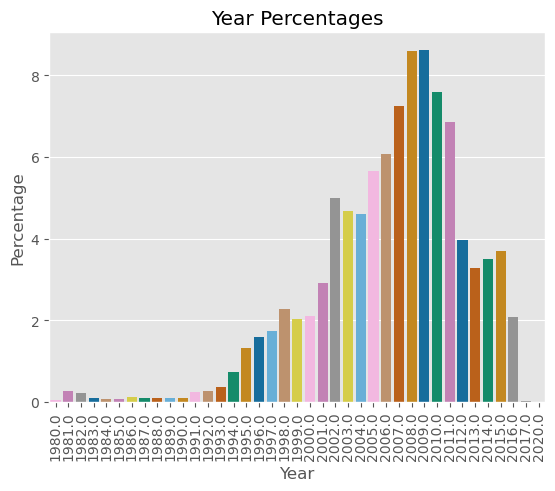

In [29]:
# Look at year counts
percentage_plot(df, x='Year')

/home/alejandro/miniconda3/envs/data-analysis/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


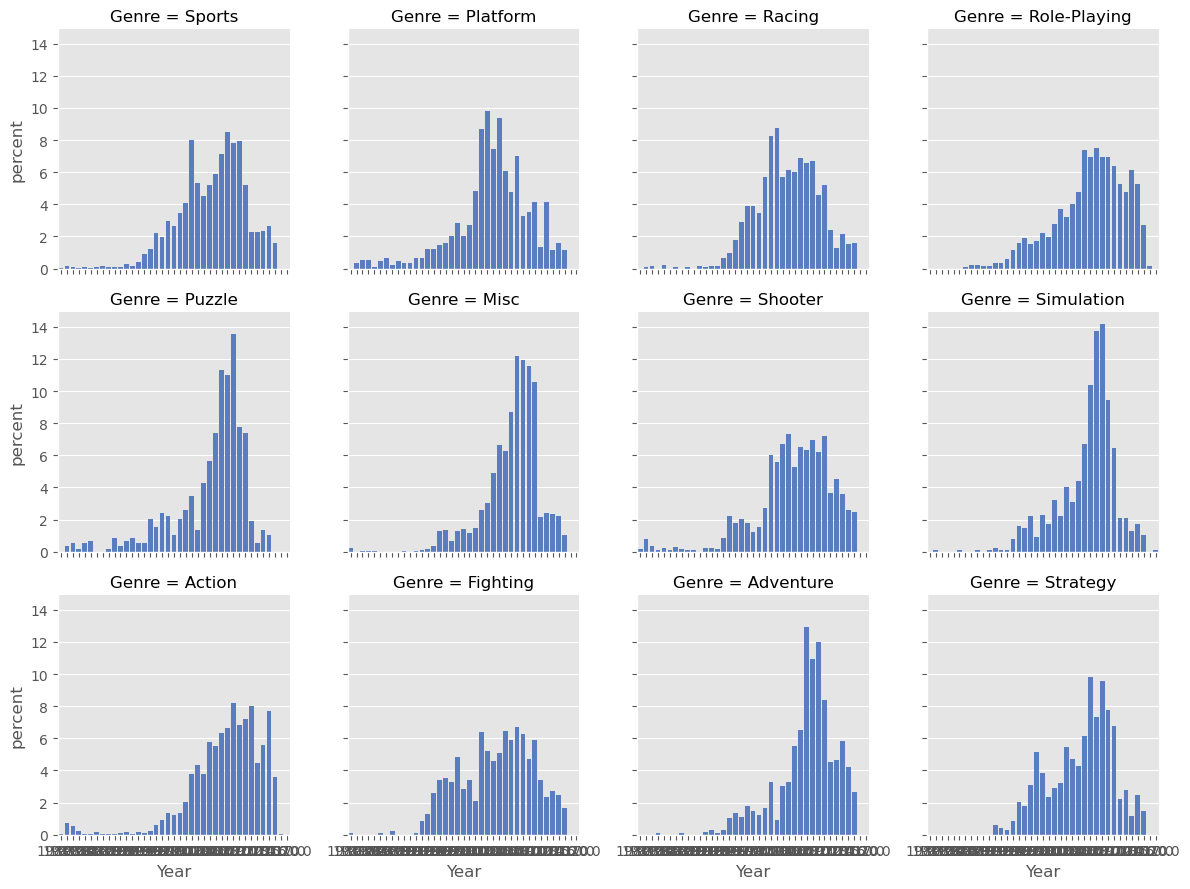

In [35]:
# Look at Genre distribution per year
g = sns.FacetGrid(df, col='Genre', col_wrap=4)

g.map(sns.countplot, 'Year', stat='percent')
